In [2]:
%pip install -r requirements.txt

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   -------------------------------------- - 9.4/9.7 MB 53.3 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 40.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------- ------------------------- 2.9/8.1 MB 21.0 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 14.2 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 9.8 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 8.2 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 4.8 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 5.3 MB/s eta 0:00:02
   ------------ ----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

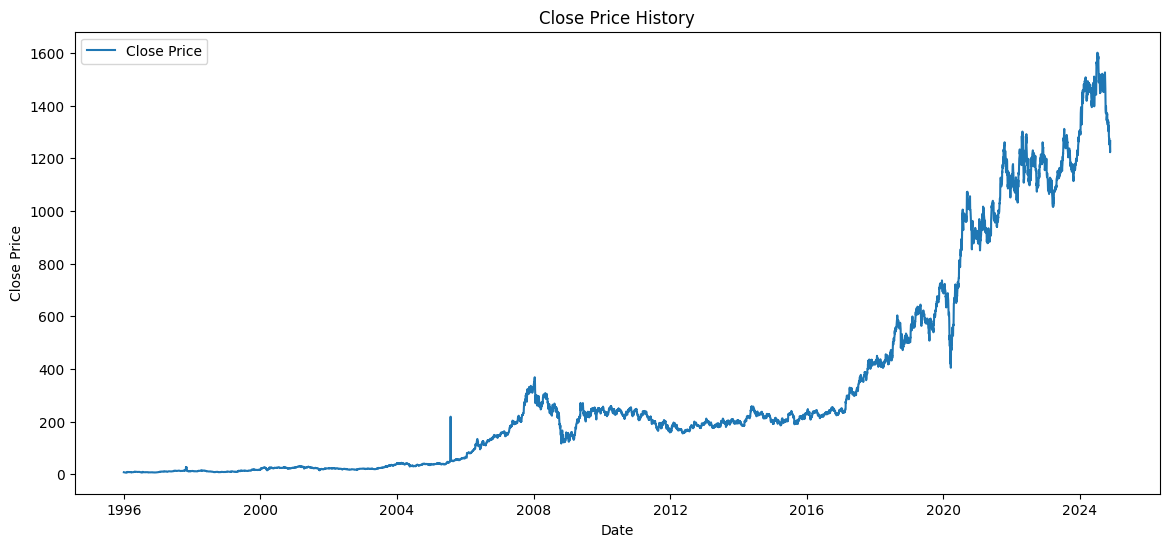

In [3]:

import pandas as pd

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('nse/RELIANCE.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Visualize the data
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [4]:
# Data preprocessing
def preprocess_lstm_data(df, column='Close', time_step=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[[column]])

    X, y = [], []
    for i in range(time_step, len(scaled_data)):
        X.append(scaled_data[i-time_step:i, 0])
        y.append(scaled_data[i, 0])
    return np.array(X), np.array(y), scaler

time_step = 60
X, y, scaler = preprocess_lstm_data(df)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [5]:

# Build the stacked LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=False),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)


Epoch 1/20


c:\Users\pande\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.0013
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 3.2855e-05
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 3.5057e-05
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 3.0522e-05
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 3.5673e-05
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 2.9878e-05
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 2.7496e-05
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 2.8322e-05
Epoch 9/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 2.5694e-05
Epoch 10/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 2.2439e-05
Epoch 11/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 2.2137e-05
Epoch 12/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 2.3897e-05
Epoch 13/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 2.6408e-05
Epoch 14/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 1.6305e-0

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
RMSE: 22.407904944006987
MAE: 17.069511832422148


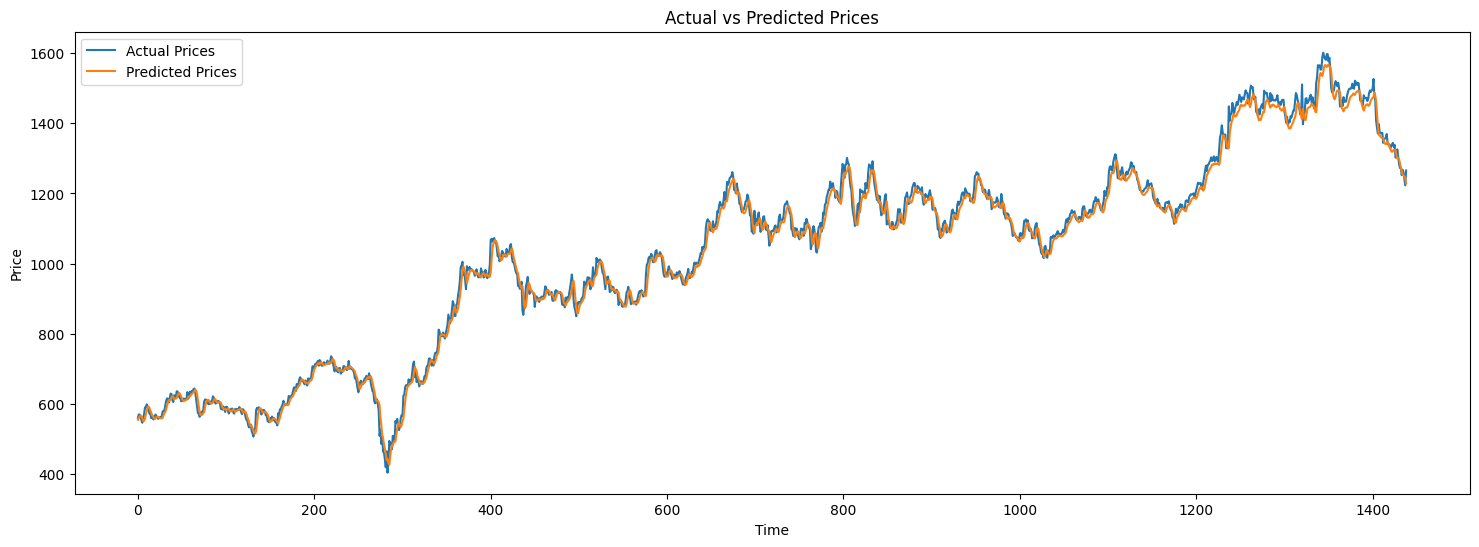

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Reverse scaling
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Plot predictions vs actual
plt.figure(figsize=(18, 6))
plt.plot(y_test_rescaled, label='Actual Prices')
plt.plot(y_pred_rescaled, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
# Save the trained model
model.save('stacked_lstm_model.keras')
